# Data

We will first inspect the data to see what we are working with. We will be using the wikitext-raw-2 dataset, which is a collection of Wikipedia articles.

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
os.chdir('../')

In [3]:
pwd

'c:\\Users\\kuotz\\rag-evaluation'

In [4]:
from src.utils import *

Utils contains helper functions for loading, preprocessing, and saving the data.

In [5]:
PATH_TEST_FILE = 'data/raw/test.parquet'

In [6]:
# Reading the dataset
df = pd.read_parquet(PATH_TEST_FILE)

In [7]:
text = ''
for line in df['text']:
    text += line

In [8]:
text[:100]

' = Robert Boulter = \n Robert Boulter is an English film , television and theatre actor . He had a gu'

In [9]:
# Save as txt file
if not os.path.exists('data/raw'):
    os.makedirs('data/raw')
with open('data/raw/test.txt', 'w') as f:
    f.write(text)

In [10]:
print(f"Sample text: \n\n {word_wrap(text[:500])}")

Sample text: 

  = Robert Boulter = 
 Robert Boulter is an English film , television
and theatre actor . He had a guest @-@ starring role on the television
series The Bill in 2000 . This was followed by a starring role in the
play Herons written by Simon Stephens , which was performed in 2001 at
the Royal Court Theatre . He had a guest role in the television series
Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in
the episode " Teddy 's Story " of the television series The Long Firm ;
he s


Let's first extract the topics in the dataset.

In [11]:
main_topics = extract_main_topics(text)

main_topics[:10]

['Robert Boulter',
 'Du Fu',
 'Kiss You ( One Direction song )',
 'Ise @-@ class battleship',
 'Dick Rifenburg',
 '1933 Treasure Coast hurricane',
 'Second Battle of Naktong Bulge',
 'Hed PE',
 'Ironclad warship',
 'Little Gidding ( poem )']

In [19]:
all_topics = extract_all_topics(text)
all_topics[:10]

['Robert Boulter',
 'Career',
 '2000 – 2005',
 '2006 – present',
 'Filmography',
 'Film',
 'Television',
 'Theatre',
 'Du Fu',
 'Life']

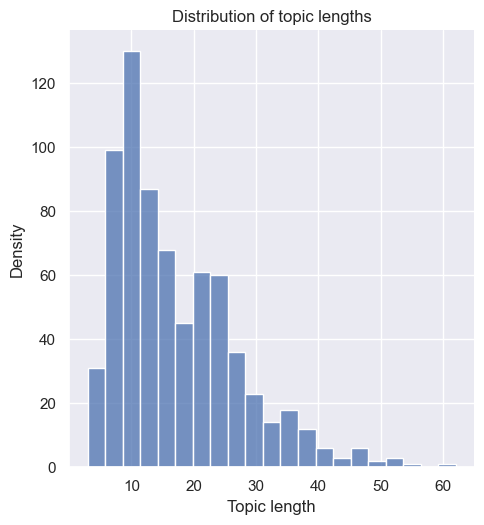

In [13]:
# distribution of topic lengths
sns.set()
sns.displot([len(t) for t in all_topics])
plt.xlabel('Topic length')
plt.ylabel('Density')
plt.title('Distribution of topic lengths')
plt.show()


We understand that the data is in heierarchial format, so we will inject higher level topics into the lower level topics.

    Example: 
    
    = Topic =
    == Subtopic ==
    === Subsubtopic ===

    will be converted to:
    = Topic =
    = Topic-Subtopic =
    = Topic-Subtopic-Subsubtopic =



In [15]:
new_text = modify_topics(text)

In [16]:
new_main_topics = extract_main_topics(new_text)

In [17]:
# All topics
new_all_topics = extract_all_topics(new_text)

In [20]:
all_topics[:10]

['Robert Boulter',
 'Career',
 '2000 – 2005',
 '2006 – present',
 'Filmography',
 'Film',
 'Television',
 'Theatre',
 'Du Fu',
 'Life']

In [18]:
new_all_topics[:10]

['Robert Boulter',
 'Robert Boulter-Career',
 'Robert Boulter-Career-2000 – 2005',
 'Robert Boulter-Career-2006 – present',
 'Robert Boulter-Filmography',
 'Robert Boulter-Filmography-Film',
 'Robert Boulter-Filmography-Television',
 'Robert Boulter-Filmography-Theatre',
 'Du Fu',
 'Du Fu-Life']

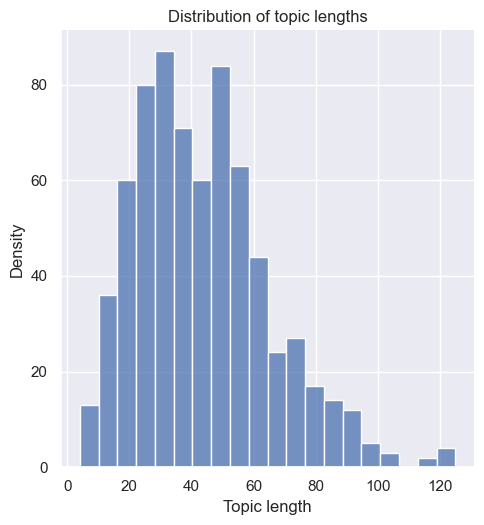

In [21]:
sns.displot([len(t) for t in new_all_topics])
plt.xlabel('Topic length')
plt.ylabel('Density')
plt.title('Distribution of topic lengths')
plt.show()

In [22]:
# topics over 100 characters
long_topics = [t for t in new_all_topics if len(t) > 100]
print(f'There are {len(long_topics)} topics over 500 characters long.')

There are 9 topics over 500 characters long.


In [23]:
long_topics

['Ironclad warship-Early ironclad ships and battles-First battles between ironclads : the U.S. Civil War',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-Training and debut ( 2000 – 2002 )',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-WWE Championship reigns ( 2002 – 2004 )',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-Final storylines and departure ( 2004 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-Feud with Triple H and ending the Streak ( 2012 – 2014 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-WWE World Heavyweight Champion ( 2014 – 2015 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-Various feuds and storylines ( 2015 – present )',
 'Commonwealth War Graves Commission-Burial sites and memorials-Cemetery design-Common architectural design features',
 'Commonwealth War Graves Commission-Burial sites and 

In [24]:
long_topics[:10]

['Ironclad warship-Early ironclad ships and battles-First battles between ironclads : the U.S. Civil War',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-Training and debut ( 2000 – 2002 )',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-WWE Championship reigns ( 2002 – 2004 )',
 'Brock Lesnar-Professional wrestling career-World Wrestling Federation / Entertainment-Final storylines and departure ( 2004 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-Feud with Triple H and ending the Streak ( 2012 – 2014 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-WWE World Heavyweight Champion ( 2014 – 2015 )',
 'Brock Lesnar-Professional wrestling career-Return to WWE-Various feuds and storylines ( 2015 – present )',
 'Commonwealth War Graves Commission-Burial sites and memorials-Cemetery design-Common architectural design features',
 'Commonwealth War Graves Commission-Burial sites and 

In [26]:
search_string = 'Thus , k will have units of impedance , that is , ohms . It is readily apparent that in order for k to be constant ,'
print(word_wrap(extract_chars_around_string(text, search_string, 50, 500)))

onstant k " is the value given by , 
 <formula> 
 Thus , k will have
units of impedance , that is , ohms . It is readily apparent that in
order for k to be constant , Y must be the dual impedance of Z. A
physical interpretation of k can be given by observing that k is the
limiting value of Zi as the size of the section ( in terms of values of
its components , such as inductances , capacitances , etc . )
approaches zero , while keeping k at its initial value . Thus , k is
the characteristic impedance , Z0 , of the transmission line that would
be formed by these infinitesimally small sections . It is also the
image impedance of the section at resonance , in th


In [27]:
print(word_wrap(extract_chars_around_string(text, search_string, 100, 50)))

nce Z , and a shunt admittance Y. The " k " in " constant k " is the
value given by , 
 <formula> 
 Thus , k will have units of impedance ,
that is , ohms . It is readily apparent that in order for k to be
constant , Y must be the dual impedance of Z. A physical int


In [28]:
print(word_wrap(extract_chars_around_string(text, search_string, 0, 0)))

Thus , k will have units of impedance , that is , ohms . It is readily
apparent that in order for k to be constant ,


In [29]:
topic_char_counts = count_chars_in_topics(new_text)

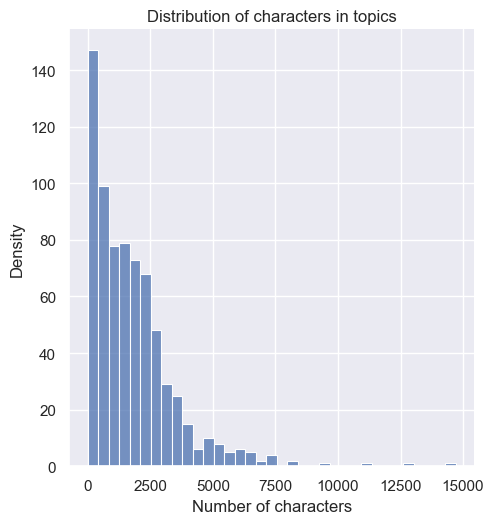

In [30]:
# plot the distribution of characters in topics
sns.displot([count for count in topic_char_counts.values()])
plt.xlabel('Number of characters')
plt.ylabel('Density')
plt.title('Distribution of characters in topics')
plt.show()


---